<center><h1>Java Spring Boot Tutorial</h1></center>


<a id="1000"></a>
## Indice:

- [NOTE](#100)
- [PARTE 1: Spring Inizializer](#0)
- [PARTE 2: Struttura del progetto](#1)
- [PARTE 3: Annotazioni](#2)
- [PARTE 4: Package CONTROLLER](#3)
    - [PARTE 4.1: Classe MainController](#3.1)
- [PARTE 5: Package MODEL](#4)
- [PARTE 6: Dependency Injection](#5)
- [PARTE 7: Definizione delle properties](#6)
- [PARTE 8: Creazione delle entità](#7)
- [PARTE 9: Enumerazioni](#8)
- [PARTE 10: Superclassi](#9)
- [PARTE 11: Foreign Key](#10)
- [PARTE 12: Chiavi con attributi multipli](#11)
- [PARTE 13: Struttura dei Package di lavoro](#12)

<a id="100"></a>
### NOTE VARIE
- Tutte le entità devono essere classi pulite che non implementano logiche. Devono implementare sempre un costruttore senza parametri (annotazione LOMBOK <span style="background-color:#00FFFF;">@NoArgsConstructor</span><span style="background-color:#FFFF00;">(Classe)</span><br>). Euqals() and HashCode andrebbero implementate solo sulla PK.
- <span style="background-color:#00FFFF;">@Column(...,columnDefinition="TEXT) </span><span style="background-color:#FFFF00;">(Attributo)</span><br>. Quando si definisce il tipo di dato nel DB fare attenzione a che il VENDOR del DB supporti il tipo di dato.
- Se modifico il codice java eliminando un attributo da una classe con annotazione <span style="background-color:#00FFFF;">@Entity</span><span style="background-color:#FFFF00;">(Classe)</span><br>quando riavvio un'app la colonna relativa del DB non viene cancellata. E' meglio cancellare l'intera tabella dal DB e ricrearla all'avvio dell'app 
- I valori primitivi non possono essere NULL quindi non ha senso invocare <span style="background-color:#00FFFF;">@Column(nullable = flase)</span><span style="background-color:#FFFF00;">(Metodo)</span><br>
- Quando implemento una tabella con una logica di aggiornamento se viene inserito un record con un campo soggetto ad aggiornamento per la prima volta, non c'è bisogno di inserire una data di termine. Ma se inserisco un nuovo record che aggiorna quel tipo di dato, devo inserire una data di termine per il campo precedente, altrimenti risulterebbero entrambi validi (Es. prezzo_prodotti, un porodtto ha un prezzo che può essere aggiornato, quindi ogni nuovo aggiornamento di prezzo dovrebbe indicare una data di termine per il prezzo precedente)

[Torna all'indice](#1000)

<a id="0"></a>
### PARTE 1: Spring Inizializer

Per poter avviare un progetto Spring Boot dobbiamo prima creare la struttura del progetto per poi importarla sul nostro IDE. Per questo dobbiamo recarci all'URL [https://start.spring.io/](https://start.spring.io/). Cliccando sul precedente link verremo reindirizzati alla seguente pagina:

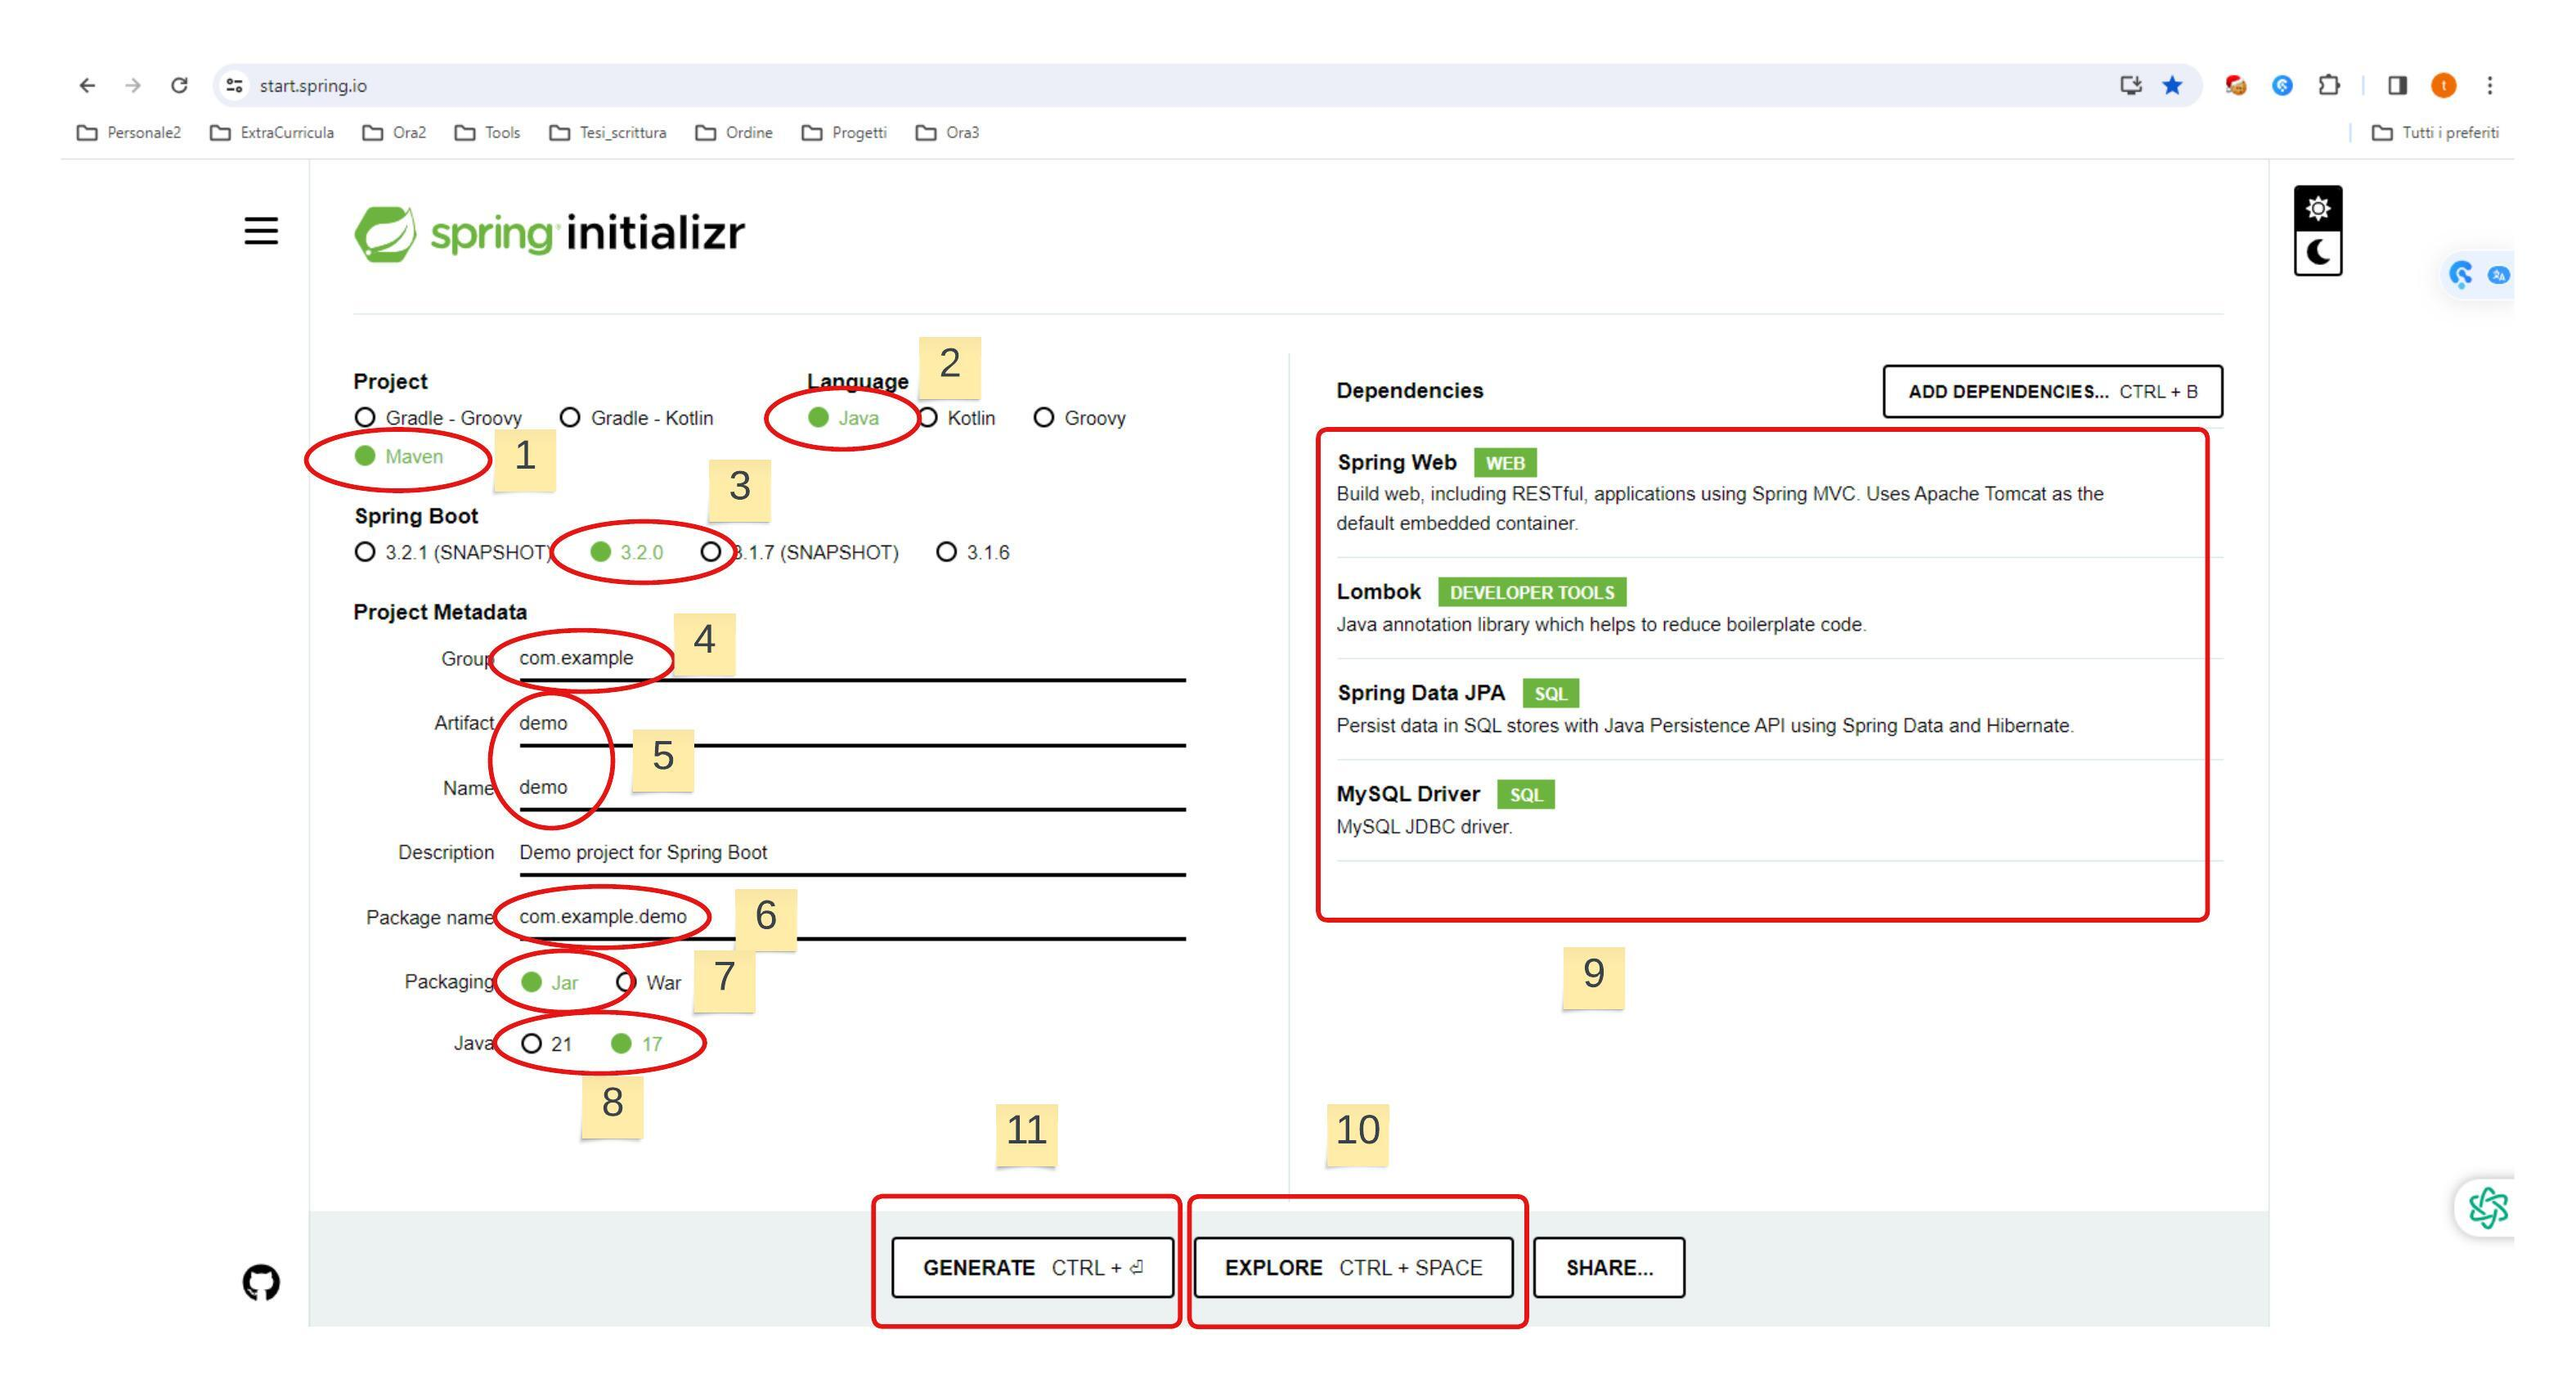

Nell'immagine sono evidenziati e annotati con numeri i campi che dovranno essere compilati o modificati in base alle esigenze del nostro progetto. Analizziamo i singoli campi:
1. Tipo di progetto, nel nostro caso sceglieremo <span style="background-color: #FFA07A;">MAVEN</span>
2. Il linguaggio nel nostro caso sarà <span style="background-color: #FFA07A;">JAVA</span>
3. La versione di spring Boot che stiamo utilizzando
4. Il dominio aziendale, lo costruiamo nel seguente modo <span style="background-color: #FFA07A;">paese.nomeazienda.nomeapp</span>
5. Ambito specifico di sviluppo dell'applicazione, il Name ha in genere lo stesso valore
6. Il nome del package è generato automaticamente in base alle informazioni inserite ai punti 4 e 5
7. Lasciamo il Packaging come <span style="background-color: #FFA07A;">JAR</span>
8. La nostra versione di java installata sul sistema operativo
9. Le dependencies da importare. Per i nostri progetti avremmo bisogno delle seguenti dipendenze:
    * <span style="background-color: #FFFF00;">Spring Web(Spring Boot Starter Web nel file pom.xml)</span>
        - Questa dipendenza include tutto il necessario per un'applicazione web con spring Boot. Integra vari componenti chiave come Spring MVC per la creazione di web app, Jackson per il parsing dei JSON, la validazione, e un server Tomcat incorporato come contenitore servlet predefinito.
    * <span style="background-color: #FFFF00;">Lombok</span>
        - Fornisce delle annotazioni che, una volta apllicate, generano automaticamente il codice necessario duratne la fase di compilazione(Es. metodi Getter e Setter, Costruttori etc...)
    * <span style="background-color: #FFFF00;">Spring Data JPA</span>
        -  Semplifica notevolmente lo sviluppo di applicazioni basate su database in Spring Boot, permettendo agli sviluppatori di concentrarsi sulla logica di business piuttosto che sulle operazioni di basso livello con il database.
    * <span style="background-color: #FFFF00;">MySQL Driver</span>
        - Essenziale per connettere l'applicazione a un database MySQL. Questo driver JDBC (Java Database Connectivity) permette all'applicazione di interagire con il database MySQL, eseguire query e gestire i dati.
10. Permette di esplorare la struttura e i file del progetto che si sta per creare
11. Gerena il progetto che potrà poi essere importato per iniziare il lavoro

Il progetto dovrà poi essere importato su un IDE. Per la seguente guida faremo riferimento all'IDE <span style="background-color: #FFA07A;">IntelliJ</span>. Per l'import faremo i seguenti passaggi:

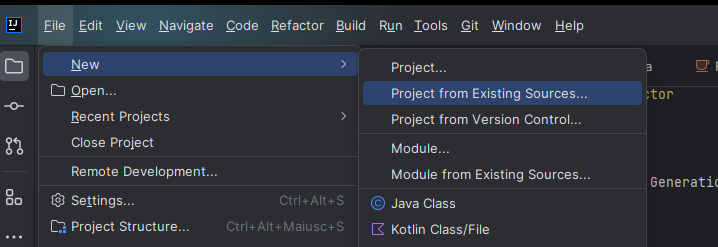

<span style="background-color: #FFFF00;">FILE -> NEW -> PROJECT FROM EXISTING SOURCE</span>


<img src="Tutorial/Import2.png" width="400">
Selezionare la cartella root del progetto

<img src="Tutorial/Import3.png" width="600">
Selezionare <span style="background-color: #FFFF00;">IMPORT PROJECT FROM EXTERAL SOURCE</span> e scegliere <span style="background-color: #FFFF00;">MAVEN</span> come tipo di progetto

[Torna all'indice](#1000)

<a id="1"></a>
### PARTE 2: Struttura del progetto

<img src="Tutorial/Struttura.jpeg" width="600">

L'immagine mostra la struttura del progetto dopo che è stato importato. Sono state annotate le parti di interesse per il nostro corso.
1. Il nome del package come è stato creato in Spring Inizializer
2. La classe Main creata automaticamente 
3. Il file <span style="background-color: #FFFF00;">APPLICATION.PROPERTIES</span> in cui possiamo andare ad inserire alcuni statement che permettono di modificare alcune impostazioni del progetto. 
4. Il file <span style="background-color: #FFFF00;">POM.XML</span> in cui possiamo vedere la gestione delle dipendenze

[Torna all'indice](#1000)

<a id="2"></a>
### PARTE 3: Annotazioni

Tutti i componenti di un progetto Spring (Metodi, Classi, Parametri, Attributi) posso essere "annotati". Le annotazioni definiscono un "comportamento" dell'elemento all'interno del progetto Spring Boot. La definizione delle annotazioni è più semplice da comprendere nell'uso pratico piuttosto che in una definizione teorica e astratta. Nel seguito della guida vederemo in dettaglio l'uso delle annotazioni nei contesti specifici.
Le annotazioni sono precedute dal carattere <span style="background-color: #FFFF00;">@</span>.
Per ogni annotazioni nella seguente guida faremo riferimento anche alla parte del codice cui si riferisce, in particolare:
- Classe
- Metodo
- Parametro
- Attributo
- Altro (In genere all'interno di una classe non legato ad un elemento specifico)

Nella classe Main viene generata automaticamente l'annotazione:
<span style="background-color: #FFFF00;">@SpringBootApplication</span>

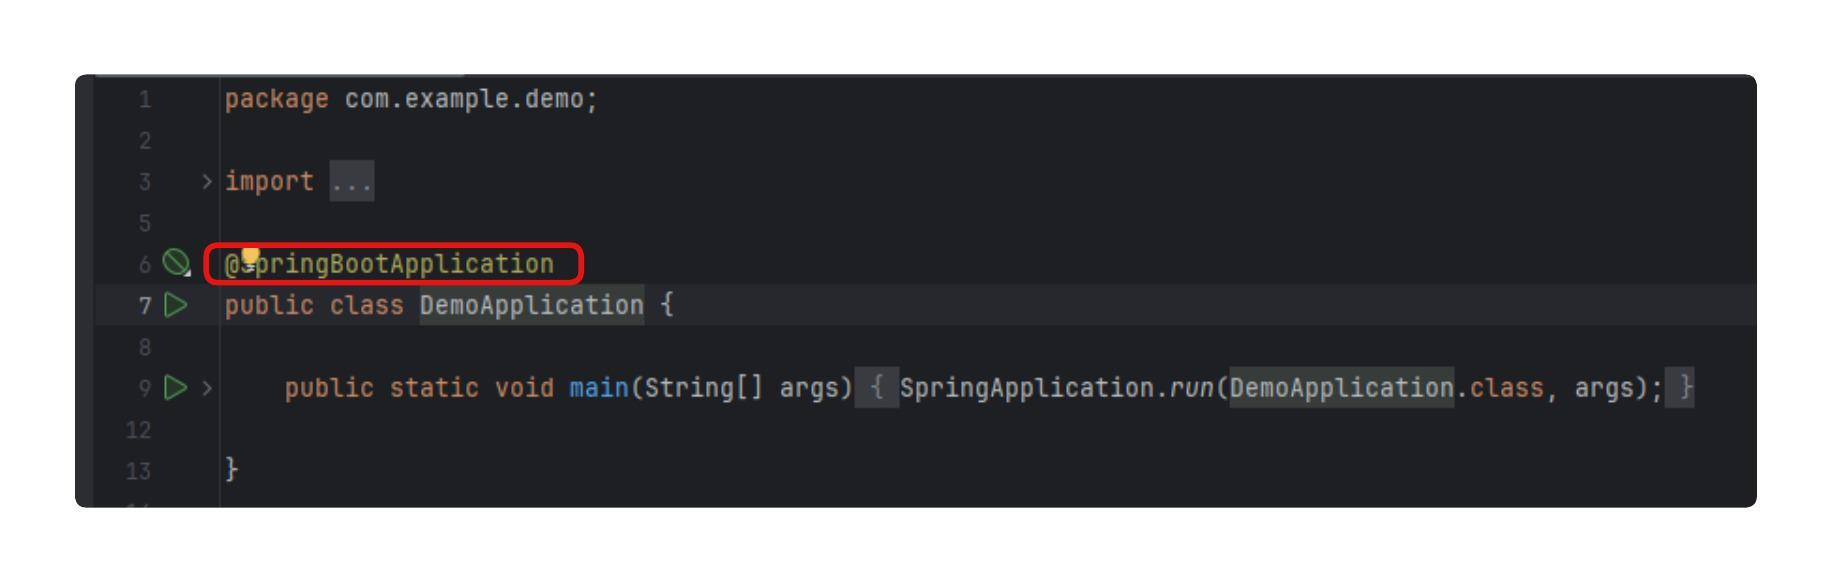

Questa annotazione serve come punto di partenza per l'avvio di una applicazione SpringBoot. Richiama al suo interno altre annotazioni. Non c'è bisogno di fare nulla riguardo questa annotazione.

[Torna all'indice](#1000)

<a id="3"></a>
### PARTE 4: Package CONTROLLER

Nella logica VCM il package controller conterrà tutte le classi reltive alla fase di CONTROLLER. 

<a id="3.1"></a>
#### PARTE 4.1: Classe MainController

La classe main controlle contiene la definizione dei nostri endpoint. Vediamo tutte le annotazioni che andremo ad utilizzare in questa classe:
    

<span style="background-color:#00FFFF;">@RestController</span><span style="background-color:#FFFF00;">(Classe)</span>
```java 
@RestController 
public class MainController {
    ...(some code)
}
```
La classe gestisce le richieste HTTP e permette di creare gli endpoint ognuno definito per un tipo di richiesta (GET, POST, PUT...)

<span style="background-color:#00FFFF;">@GetMapping</span><span style="background-color:#FFFF00;">(Metodo)</span><br>
<span style="background-color:#00FFFF;">@RequestParam</span><span style="background-color:#FFFF00;">(Parametro)</span><br>
<span style="background-color:#00FFFF;">@PathVariable</span><span style="background-color:#FFFF00;">(Parametro)</span>
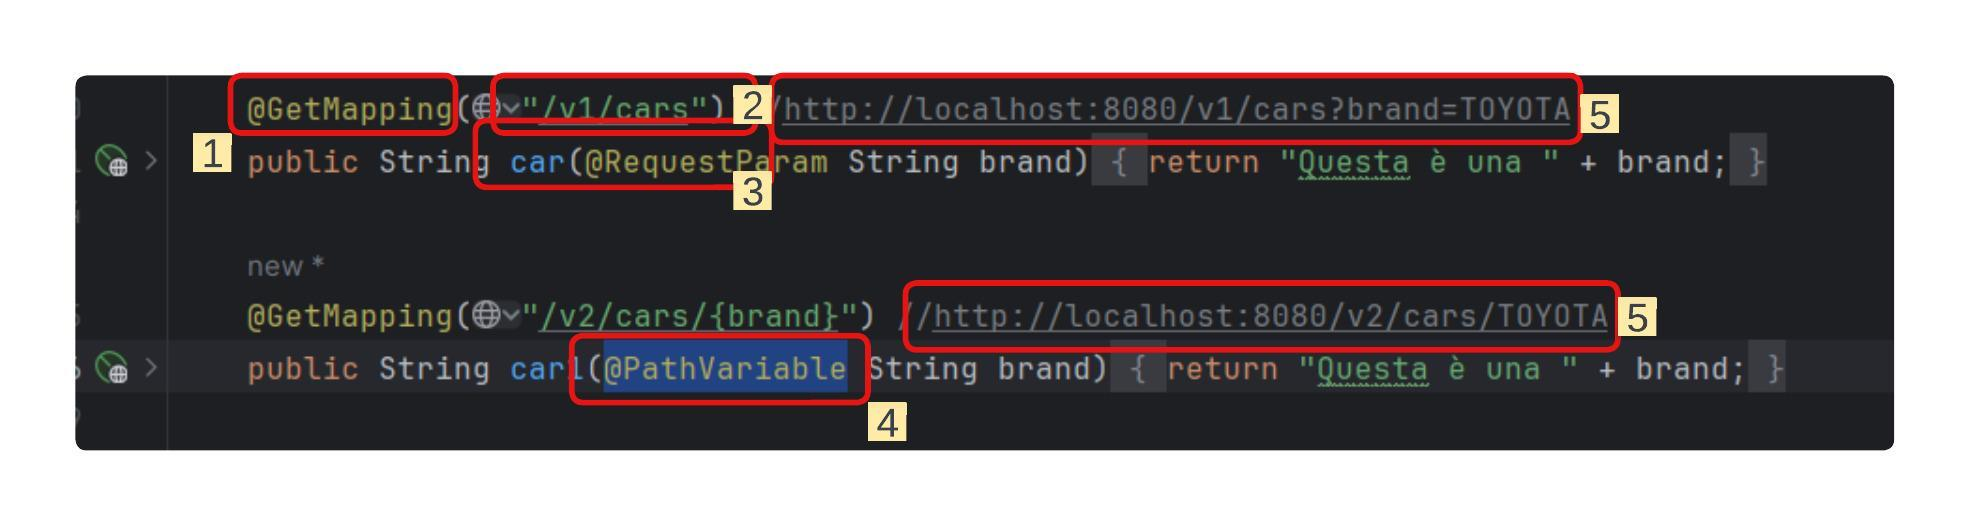

1. L'annotazione <span style="background-color:#00FFFF;">@GetMapping</span> imposta un endpoint raggiungibile da un metodo GET. Sarà quindi possibile utilizzare la chiamata all'endpoint direttamente da un browser.
2. L'URI dell'endpoint che verrà chiamato
3. L'annotazione <span style="background-color:#00FFFF;">@RequestParam</span> indica il modo in cui verranno passati i parametri al metodo GET. Con questa annotazione indichiamo che passeremo i parametri tramite "?param=value" nell'URL. I parametri della richiesta verranno mappati direttamente sui parametri del metodo java
4. L'annotazione <span style="background-color:#00FFFF;">@PathVariable</span> invece indica che i parametri saranno passati direttamente come parte dell'URL
5. Gli URLs che permettono di chiamare l'endpoint rispettivamente al punto 3 e al punto 4

<span style="background-color:#00FFFF;">@PostMapping</span><span style="background-color:#FFFF00;">(Metodo)</span><br>
<span style="background-color:#00FFFF;">@RequestBody</span><span style="background-color:#FFFF00;">(Parametro)</span><br>
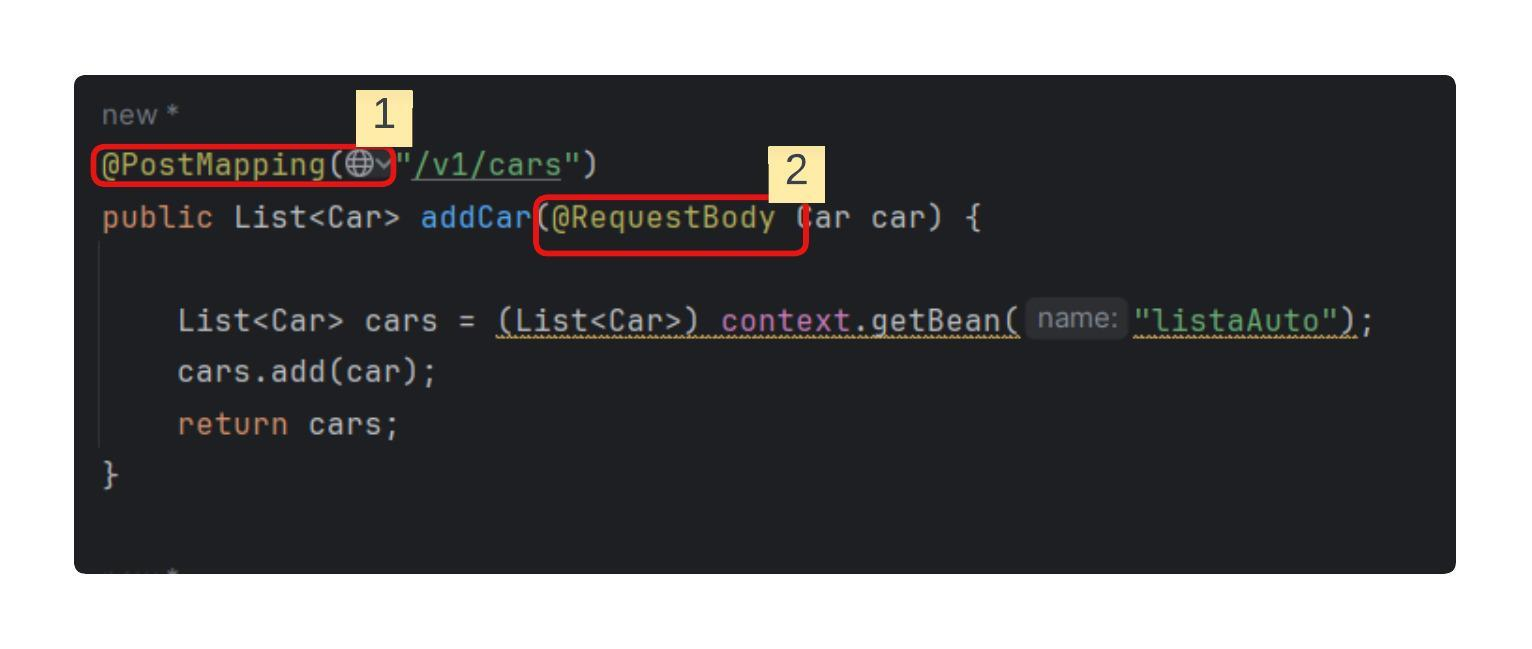

1. L'annotazione <span style="background-color:#00FFFF;">@PostMapping</span> crea un endpoint raggiungibile tramite richiesta POST
2. <span style="background-color:#00FFFF;">@RequestBody</span> Indica che i parametri verranno passati come Body della richiesta POST. A differenza di <span style="background-color:#00FFFF;">@RequestParam</span> può gestire tipi di dati più complessi come JSON o XML e si usa con i metodi PUT e POST.


<span style="background-color:#00FFFF;">@PutMapping</span><span style="background-color:#FFFF00;">(Metodo)</span><br>
Per richieste di tipo PUT che aggiornano un record completo. Può utilizzare sia annotazioni <span style="background-color:#00FFFF;">@RequestBody</span> sia annotazioni <span style="background-color:#00FFFF;">@RequestParam</span>. L'importante è che il payload della richiesta contenga una versione completa della risorsa da aggiornare.

<span style="background-color:#00FFFF;">@PatchMapping</span><span style="background-color:#FFFF00;">(Metodo)</span><br>
Per richieste di tipo PATCH che aggiornano un dato parzialmente. Può utilizzare sia annotazioni <span style="background-color:#00FFFF;">@RequestBody</span> sia annotazioni <span style="background-color:#00FFFF;">@RequestParam</span>

<span style="background-color:#00FFFF;">@DeleteMapping</span><span style="background-color:#FFFF00;">(Metodo)</span><br>
Per richieste di tipo DELETE che cancellano un dato. Può utilizzare annotazioni <span style="background-color:#00FFFF;">@RequestParam</span>

[Torna all'indice](#1000)

<a id="4"></a>
### PARTE 5: Package MODEL

Nel Package Model verranno inserite tutte le classe del nostro progetto. Queste classi potranno essere annotate con le annotazioni della dipendenza <span style="background-color: #FFA07A;">Lombok</span>. In Lombok abbiamo visto nel nostro corso le seguenti annotazioni:
1. <span style="background-color:#00FFFF;">@Getter</span><span style="background-color:#FFFF00;">(Classe)</span>
2. <span style="background-color:#00FFFF;">@Setter</span><span style="background-color:#FFFF00;">(Classe)</span>
3. <span style="background-color:#00FFFF;">@NoArgsConstructor</span><span style="background-color:#FFFF00;">(Classe)</span>
4. <span style="background-color:#00FFFF;">@AllArgsConstructor</span><span style="background-color:#FFFF00;">(Classe)</span>
5. <span style="background-color:#00FFFF;">@toString</span><span style="background-color:#FFFF00;">(Classe)</span>
6. <span style="background-color:#00FFFF;">@EqualsAndHashCode</span><span style="background-color:#FFFF00;">(Classe)</span>

Le precedenti annotazioni si occupano di inserire all'interno della classe i metodi che fanno riferimento al nome dell'annotazione stessa

[Torna all'indice](#1000)

<a id="5"></a>
### PARTE 6: Dependency Injection

<span style="background-color:#00FFFF;">@Bean("Nome Bean")</span><span style="background-color:#FFFF00;">(Metodo)</span><br>
Inserisce l'oggetto all'interno dell'APPLICATION CONTEXT. L'oggetto verrà eseguito all'avvio dell'applicazione e sarà recuperabile attraverso L'APPLICATION CONTEXT che lo inietterà nel codice. Ogni oggetto annotato con Bean dovrà avere un nome per poter essere iniettato.

<span style="background-color:#00FFFF;">@Autowired</span><span style="background-color:#FFFF00;">(Nella classe)</span><br>
Richiama un oggetto dall'APPLICATION CONTEXT

```java 
@Autowired
ApplicationContext context;
.....(Some code)
(NomeClasse) var = (NomeClasse) context.getBean("Nome Bean");
```
L'oggetto ApplicationContext conterrà tutti gli oggetti annotati come Bean, recuperabili attraverso il nome dato agli stessi. Gli oggetti dovranno subire un cast per renderli compatibili con le variabili he andranno a riferirli.

Ogni Bean verrà istanziato o eseguito una sola vota allo start dell'applicazione. 
Posso instanziare un Bean anche tramite una variabile che ha stesso nome e tipo del Bean

```java 
@Autowired
ArrayList<Car> listaAuto;
```

Nell'esempio precedente un'array list di Car istanzia listaAuto che è un Bean nell'APPLICATION CONTEXT con lo stesso nome.

[Torna all'indice](#1000)

<a id="6"></a>
### PARTE 7: Definizione delle properties

Di default Sping inizializer crea un file <span style="background-color:#FFFF00;">application.properties</span> per la definizione delle properties del progetto. Possiamo però scegliere di utilizzare un file con sintassi di tipo YAML. Quindi cancelleremo il file <span style="background-color:#FFFF00;">application.properties</span> e creeremo un file <span style="background-color:#FFFF00;">application.yaml</span>
La struttura del file yaml sarà la seguente.
I commenti spigano le varie sezioni.
In generale basta copiare e incollare il file. L'unica attenzione va prestata al campo <span style="background-color:#FFFF00;">ddl-auto: update</span> e di utilizzare l'opzione più adatta al proprio progetto. I possibili valori sono indicati nei commenti

```yaml
server:
  port: 8080

#Nome dell'applicazione
spring:
  application:
    name: myblog

  #Configurazione db
  #Queste properties si trovano all'interno della dependency JPA
  datasource:
    url: jdbc:mysql://${MYSQL_HOSTNAME}:${MYSQL_PORT}/${MYSQL_DATABASE_NAME}?ssl-mode=REQUIRED
    #Non vogliamo scrivere in chiaro i dati sensibili. Dobbiamo usare delle variabili di ambiente in intellij
    username: ${MYSQL_USERNAME}
    password: ${MYSQL_PASSWORD}
    driver-class-name: com.mysql.cj.jdbc.Driver

  jpa:
    hibernate:
    #Quanto l'applicazione parte interagisce con il database. ddl-auto values:
    # create-drop -> creazione del db all'avvio e distruzione alla chiusura dell'applicazione
    #update -> aggiorna il db con le tabelle nuove, modifica quelle attuali, non elimina le eventuali colonne che non esistono più
      #Le tabelle vengono aggiornate in base ai valori delle classi
    #validated -> confronta le entità con le tabelle e solleva eccezioni se ci sono incongruenze
    #none: non viene fatto nulla (da usare assolutamente in produzione per non toccare la struttura del database)
      ddl-auto: update
    properties:
      #Per generare delle query ottimizzate sul tipo di databse che si utilizza
      dialect: org.hibernate.dialect.MySQLDialect
      hibernate:
        #Per formattare con l'indentazione le query sql nel file di log
        format_sql: true
        use_sql_comments: true
        highlight_sql: true
    show-sql: true
    open-in-view: false
```

Nel seguente snippet di codice estratto dal file <span style="background-color:#FFFF00;">application.yaml</span> si può vedere come ci siano alcune variabili d'ambiente nella forma ${NOME_VARIABILE}. Queste variabili servono per evitare di lasciare in chiaro nel codice dati sensibili come nome utente e password. Queste variabili non sono definite a livello di sistema operativo ma sono memorizzate internamente ad Intellij

```yaml
  datasource:
    url: jdbc:mysql://${MYSQL_HOSTNAME}:${MYSQL_PORT}/${MYSQL_DATABASE_NAME}?ssl-mode=REQUIRED
    #Non vogliamo scrivere in chiaro i dati sensibili. Dobbiamo usare delle variabili di ambiente in intellij
    username: ${MYSQL_USERNAME}
    password: ${MYSQL_PASSWORD}
    driver-class-name: com.mysql.cj.jdbc.Driver
```

Vediamo i passaggi per memorizzare queste variabili

<span style="background-color: #FFFF00;">RUN -> EDIT CONFIGURATION</span>
<img src="Tutorial/EnvVar.png" width="500">

Si aprirà la seguente schermata
<img src="Tutorial/EnvVar2.png" width="500">

Aprire il menù a tendina <span style="background-color:#FFFF00;">Modify options</span>
<img src="Tutorial/EnvVar3.jpeg" width="500">

Spuntare <span style="background-color:#FFFF00;">Environment variables</span>
<img src="Tutorial/EnvVar4.png" width="400">

Cliccare sul pulsante indicato
<img src="Tutorial/EnvVar5.png" width="400">

Cliccare sul pulsante '+' per inserire una variabile. Per ogni variabile inserire nome e contenuto
<img src="Tutorial/EnvVar6.png" width="400">

[Torna all'indice](#1000)

<a id="7"></a>
### PARTE 8: Creazione delle entità

Le classi che andremo a creare devono corrispondere alle tabelle del nostro DB

Nel nostro package root creeremo il package <span style="background-color:#FFFF00;">entity</span> e al suo interno una package <span style="background-color:#FFFF00;">common</span> per le superclassi riutilizzabili e <span style="background-color:#FFFF00;">enumerated</span> per le enumerazioni che andremo ad inserire per definire alcuni attributi delle classi.E' importante mantenere aderenza anche tra il tipo di dati definiti nelle classi e il tipo di dati definiti del db.

Ogni classe che rappresenta una entità del DB sarà annotata come <span style="background-color:#00FFFF;">@Entity</span><span style="background-color:#FFFF00;">(Classe)</span>. Possiamo usare anche le annotazioni della dependency <span style="background-color:#FFFF00;">Lombok</span>.
All'avvio dell'applicazione (a seconda delle impostazioni del file <span style="background-color:#FFFF00;">application.yaml</span> le classe annotate come entity andranno a crare nel DB delle tabelle strutturate secondo gli attributi e le relative annotazioni. Ogni tabella del DB prenderà il nome della classe relativa. Se volessimo modificare il nome della tabella rispetto al nome della classe useremo l'annotazione <span style="background-color:#00FFFF;">@Table(name = "nome tabella") </span><span style="background-color:#FFFF00;">(Classe)</span>.

Vediamo le annotazioni a livello di attributo.
<span style="background-color:#00FFFF;">@Id</span><span style="background-color:#FFFF00;">(Attributo)</span><br>
Marca l'attributo come chiave primaria. Spesso associato all'annotazione:
<span style="background-color:#00FFFF;">@GeneratedValue(strategy = GenerationType.IDENTITY)</span><span style="background-color:#FFFF00;">(Attributo)</span><br>
Questa annotazione genera automaticamente i valori del campo della tabella basandosi su una strategia. La strategia indicata nel codice precedente è quella di autoincrement.<br>
<span style="background-color:#00FFFF;">@Column(nullable = true/false, lenght = n, unique = true/false, updatable = true/false)</span><span style="background-color:#FFFF00;">(Attributo)</span><br>
Possiamo definire alcuni parametri dell'attributo in modo da modelllarlo sul tipo richiesto dal db. In particolare <span style="background-color:#FFFF00;">nullable</span> indica NOT NULLm <span style="background-color:#FFFF00;">lenght</span> indica la lunghezza del corrispondente tipo VARCHAR del DB, <span style="background-color:#FFFF00;">unique</span> indica se il valore può essere duplicato nella tabella, <span style="background-color:#FFFF00;">updatable</span> indica se il valore della colonna può essere modificato dopo il primo inserimento.<br>
<span style="background-color:#00FFFF;">@JoinColumn</span><span style="background-color:#FFFF00;">(Attributo)</span> Verrà utilizzato per definire gli attributi che sono chiavi esterne nella tabella al posto di <span style="background-color:#00FFFF;">@Column</span><span style="background-color:#FFFF00;">(Attributo)</span><br>
<span style="background-color:#00FFFF;">@Lob</span><span style="background-color:#FFFF00;">(Attributo)</span> indica un attributo per caricare dati di grosse dimensioni come immagini e formati multimendiali. Spesso accompagnato a <span style="background-color:#00FFFF;">@Column(columnDefinition = "BLOB")</span><span style="background-color:#FFFF00;">(Attributo)</span> per definire il tipo di dato BLOB nel DB.<br>
<span style="background-color:#00FFFF;">@Enumerated(EnumTyppe.STRING)</span><span style="background-color:#FFFF00;">(Attributo)</span> fa riferimento a valori che saranno di tipo ENUMERATED nel DB. EnumType indica se i alori hanno un oridne gerarchico o nessun ordine. (ENumType.STRING).<br>
<span style="background-color:#00FFFF;">@CreationTimestamp(strategy = GenerationType.IDENTITY)</span><span style="background-color:#FFFF00;">(Attributo)</span><br>
<span style="background-color:#00FFFF;">@CreattionTimestamp</span><span style="background-color:#FFFF00;">(Attributo)</span>
Al momento della creazione dell'entità verrà automaticamente assegnato il valore del timestamp del momento della creazione. Associato alle classi Java Date, Calendar, LocalDateTime. Spesso associato a  <span style="background-color:#00FFFF;">@Column(updatable = false)</span><span style="background-color:#FFFF00;">(Attributo)</span>
<span style="background-color:#00FFFF;">@UpdateTimeStamp</span><span style="background-color:#FFFF00;">(Attributo)</span>
Il valore del campo viene aggiornato al timestamp ogni volta che un campo del record viene modificato


[Torna all'indice](#1000)

<a id="8"></a>
### PARTE 9: Enumerazioni

Nel package <span style="background-color:#FFFF00;">enum</span> creiammo le nostre enumerazioni. Gli attributi che saranno istanze di tali enumerazioni saranno annotati come <span style="background-color:#00FFFF;">@Enumerated(EnumTyppe.STRING)</span><span style="background-color:#FFFF00;">(Attributo)</span>

[Torna all'indice](#1000)

<a id="9"></a>
### PARTE 10: Superclassi

Le superclassi che verranno estese verranno realizzate nel package <span style="background-color:#FFFF00;">common</span>. Saranno annotate come <span style="background-color:#00FFFF;">@MappedSuperclass(EnumTyppe.STRING)</span><span style="background-color:#FFFF00;">(Classe)</span>

[Torna all'indice](#1000)

<a id="10"></a>
### PARTE 11: Foreign Key

Per segnare un attributo come chiave esterna possiamo usare 4 diversi tipi di annotazioni a seconda della cardinalità della relazione. Al contrario del DB però, le relazioni in Java sono uniderezionali. La classe dove è definita la chiave esterna sarà "propietaria" della relazione e sarà l'unica che potrà accedere alla classe collegata. Gli attributi annotati come chiavi esterne saranno istanze delle classi a cui saranno collegati.
ES.
```java
    @OneToOne
    private Avatar avatar;
```
In questo caso avremo una chiave esterna verso l'oggetto avatar di tipo Avatar. Quindi anche la chiave esterna sarà dello stesso tipo avatar.
La colonna relativa del DB verrà creata con il nome dell'attributo più il nome della chiave primaria nella classe referenziata, nel nostro esempio avatar_id (id è il nome della chiave primaria nella classe avatar)

<span style="background-color:#00FFFF;">@OneToOne</span><span style="background-color:#FFFF00;">(Attributo)</span><br>
<span style="background-color:#00FFFF;">@ManyToOne</span><span style="background-color:#FFFF00;">(Attributo)</span><br>
<span style="background-color:#00FFFF;">@OneToMany</span><span style="background-color:#FFFF00;">(Attributo)</span><br>

Le tre annotazioni precedenti funzionano in modo semplice, basta annotare l'attributo che funge da chiave esterna, dichiararlo della classe che andrà a referenziare e al massimo definire alcune specifiche attraverso l'annotazione <span style="background-color:#00FFFF;">@JoinColumn</span><span style="background-color:#FFFF00;">(Attributo)</span>

Nel caso di relazione <span style="background-color:#FFFF00;">ManyToMany</span> il problema è più complesso visto che per relazionare due tabelle nel DB abbiamo bisogno di una tabella di collegamento. Possiamo creare automaticamente la tabella di collegamento all'avvio dell'applicazione con il seguente codice:

```java
    @ManyToMany
    @JoinTable(name = "post_tags",
            joinColumns = {@JoinColumn(name="post_id", referencedColumnName = "id")},
            inverseJoinColumns = {@JoinColumn(name="tag_id", referencedColumnName = "id")}
    )
    private Set<Tag> tags;
```

L'annotazione <span style="background-color:#00FFFF;">@JoinTable</span><span style="background-color:#FFFF00;">(Attributo)</span> crea appunto la tabella di collegamento. <span style="background-color:#FFFF00;">joinColumns</span> indica il campo della tabella di collegamento che fa riferimento alla tabella propietaria della relazione. <span style="background-color:#FFFF00;">inverseJoinColumns</span> invece indica il campo della tabella di collegamento che farà riferimento alla classe non propietaria.
Nell'annotazione <span style="background-color:#00FFFF;">@JoinColumn</span><span style="background-color:#FFFF00;">(Attributo)</span> il campo "name" indica il nome che verrà creato nella parte della chiave primaria della tabella di collegamento che fa riferimento all'una o all'altra tabella, mentre "referencedColumnName" è il campo della classe referenziata collegato alla parte delle chiave primaria della tabella di collegamento.
Il tipo di dato connesso alla <span style="background-color:#FFFF00;">ManyToMany</span> deve essere ovviamente una collezione.

[Torna all'indice](#1000)

<a id="11"></a>

### PARTE 12:  Chiavi con attributi multipli

Le PK e FK che si compongono di più sattributi devono essere trattate in maniera diversa in Spring Boot. Abbiamo infatti bisogno di definire un tipo di dato con gli attributi della chiave e utilizzare il tipo di dato per istanziare la chiave nella tabella relativa. Distinguiamo 3 casi:
1. PK con attributi multipli
2. FK con attributi multipli
3. PK che è anche FK con attributi multipli

#### PK doppia

- Definisco un oggetto <span style="background-color:#00FF00;">TableId</span> (es. ReportId). L'oggetto non sarà annotato come <span style="background-color:#00FFFF;">@Entity</span><span style="background-color:#FFFF00;">(Classe)</span> ma come <span style="background-color:#00FFFF;">@Embeddable</span><span style="background-color:#FFFF00;">(Classe)</span> e implementerà <span style="background-color:#00FF00;">Serializable</span>
- L'entità che chiamerà l'oggetto Table Id lo annoterà come <span style="background-color:#00FFFF;">@EmbeddedId</span><span style="background-color:#FFFF00;">(Attributo)</span>

<img src="Tutorial/PK_DOPPIA.png">

#### FK doppia

- Definisco un oggetto Table(La classe della tabella referenziata)
- Effettuo una annotazione di cardinalità (Come facciamo normalmente per le FK)
- Definisco la relazione attraverso l'annotazione <span style="background-color:#00FFFF;">@JoinColumns</span><span style="background-color:#FFFF00;">(Attributo)</span>

<img src="Tutorial/FK_DOPPIA.png">

- L'annotazione <span style="background-color:#00FFFF;">@JoinColumns</span><span style="background-color:#FFFF00;">(Attributo)</span> prende in input un array di <span style="background-color:#00FFFF;">@JoinColumn</span><span style="background-color:#FFFF00;">(Attributo)</span> una per ogni attributo. I parametri dell'annotazione <span style="background-color:#00FFFF;">@JoinColumn</span><span style="background-color:#FFFF00;">(Attributo)</span> sono name, referencedColumnName e Nullable. Nullable sarà ovviamente = false. Name sarà il nome della FK nella tabella mentre referencedColumnName sarà il nome della PK nella tabella referenziata.

#### FK-PK doppia

- Combinazione dei due casi precedenti
- Avremo una classe  <span style="background-color:#00FF00;">TableId</span> <span style="background-color:#00FFFF;">@Embeddable</span> senza <span style="background-color:#00FFFF;">@Entity</span><span style="background-color:#FFFF00;">(Classe)</span>. Gli attributi avranno cardinalità e nullable = false. La classe implementa <span style="background-color:#00FF00;">Serializable</span>
- Definiamo un attributo <span style="background-color:#00FFFF;">@EmbeddedId</span><span style="background-color:#FFFF00;">(Attributo)</span> nella classe che implementa la PK-FK dello stesso tipo della classe  <span style="background-color:#00FF00;">TableId</span>

<img src="Tutorial/PK_FK_DOPPIA.png">

[Torna all'indice](#1000)

<a id="12"></a>


### PARTE 13: Struttura dei Package di lavoro

Il nostro progetto dovrà definire i seguenti packages:

- CONTROLLER: Comandi che andremo ad eseguire sulle entità tramite endpoint. Sarà l'interfaccia del client.
- REPOSITORY: Interfacce java, una per ogni entità che definiscono le operazioni CRUD.
- SERVICE: Implementazione della logica di business
- EXCEPTION
- DTO
- ENTITY

1. Il primo passo del nostro lavoro sarà definire le nostre entità. Vedi il [paragrafo](#7)

2. Definizione dei repositories. Le interfacce del package repository saranno annotate come <span style="background-color:#00FFFF;">@Repository</span><span style="background-color:#FFFF00;">(Classe)</span>. Possiamo però implementare l'interfaccia <span style="background-color:#00FF00;">JpaRepository<T,S></span> e in questo caso l'annotazione <span style="background-color:#00FFFF;">@Repository</span><span style="background-color:#FFFF00;">(Classe)</span> non sarà necessaria.
    Nell'interfaccia <span style="background-color:#00FF00;">JpaRepository<T,S></span> T verraccia à sostituito con il nome della classe di cui stiamo implementando il repositoy e S sarà il tipo della PK. L'intefaccia <span style="background-color:#00FF00;">JpaRepository<T,S></span> permette di effettuare le Query attraverso i <span style="background-color:#00FF00;">Metodi Derivati</span> oppure attraverso Query in SQL nativo oppure in JPQL. <br>Le query attraverso i <span style="background-color:#00FF00;">Metodi Derivati</span> possono ritornare soltanto Entità o collezioni di Entità. Per effettuare delle proieizioni sugli attributi dobbiamo utilizzare SQL nativo o JPQL. <br> I  metodi che implementano le Query in linguaggio nativo verranno annotati con <span style="background-color:#00FFFF;">@Query</span><span style="background-color:#FFFF00;">(Metodo)</span>(value = "[querySql]", nativeQuery = true). Se nativeQuery è avvalorto a false, le query saranno in linguaggio JPQL.
    
3. DEfinizione dei Services. Anche in questo caso avremo un service per ogni entity. LE classi saranno annotate come <span style="background-color:#00FFFF;">@Service</span><span style="background-color:#FFFF00;">(Classe)</span>. Nei service avremo la dependency injection del relativo repository
```java
    @Autowired
    ClasseRepository classeRepository
```
In questo modo avremo a disposizione tutti i metodi ereditati da <span style="background-color:#00FF00;">JpaRepository<T,S></span> insieme ai metodi definiti esplicitamente nel repository. Anche Se i repositories sono delle interfacce, non ci sarà nessun bisogno di implementazione in quanto sarà spring a genereare dietro le quinte il relativo codice SQL.
    
4. Infine abbiamo i Controllers, sempre uno per ogni entity. Saranno annotati a livello di classe con <span style="background-color:#00FFFF;">@Service</span><span style="background-color:#FFFF00;">(Classe)</span>. La classe conterrà i metodi che definiranno gli endpoint della nostra applicazione. ([vedi](#3)). Le classi controller possono essere annotate come <span style="background-color:#00FFFF;">@RequestMapping</span><span style="background-color:#FFFF00;">(Classe)</span>("stringa Endpoiint"). In questo modo ogni endpoint inizierà con la stringa indicata. I vari metodi saranno annotati relativamente al tipo di endpoint che andremo a definire([vedi](#3)).
    
    [Torna all'indice](#1000)